In [1]:
import os.path as path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.patches as mpatches
%matplotlib inline
# Dependencies and Setup

# File to Load (Remember to change these)
city_file = path.join("data", "city_data.csv")
ride_file = path.join("data", "ride_data.csv")

# Read the City and Ride Data
city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

# Combine the data into a single dataset
pyber_df = pd.merge(city_df, ride_df, on="city", how="inner")

# Change city type to number, add city type name column
pyber_df["city_type_name"] = pyber_df["type"]

city_type_names = []

for items in pyber_df.city_type_name.unique():
    city_type_names.append(items)
    print(items)

city_type_cnt = pyber_df["city_type_name"].nunique()

value_list = []

for i in range(city_type_cnt):
    value_list.append(i)
    print(i)

pyber_df["type"].replace(to_replace=city_type_names,
                         inplace=True,
                         value=value_list)

# Display the data table for preview
pyber_df.head()


Urban
Suburban
Rural
0
1
2


,city,driver_count,type,date,fare,ride_id,city_type_name
0,Richardfort,38,0,2018-02-24 08:40:38,13.93,5628545007794,Urban
1,Richardfort,38,0,2018-02-13 12:46:07,14.00,910050116494,Urban
2,Richardfort,38,0,2018-02-16 13:52:19,17.92,820639054416,Urban
3,Richardfort,38,0,2018-02-01 20:18:28,10.26,9554935945413,Urban
4,Richardfort,38,0,2018-04-17 02:26:37,23.00,720020655850,Urban


In [2]:
averages_df = pyber_df.groupby(["city"], as_index=False).mean()

averages_df["ride_count"] = pyber_df.groupby(["city"])\
    .count()["ride_id"].tolist()

averages_df["driver_count"] = pyber_df.groupby(["city"])\
    .median()["driver_count"].tolist()

averages_df["city_type"] = pyber_df.groupby(["city"])\
    .first()["type"].tolist()

averages_df["city_type_name"] = pyber_df.groupby(["city"])\
    .first()["city_type_name"].tolist()

averages_df.drop(labels=["ride_id"], axis=1, inplace=True)

averages_df["fare"] = averages_df["fare"].round(2)

averages_df.head()



,city,driver_count,type,fare,ride_count,city_type,city_type_name
0,Amandaburgh,12.0,0.0,24.64,18,0,Urban
1,Barajasview,26.0,0.0,25.33,22,0,Urban
2,Barronchester,11.0,1.0,36.42,16,1,Suburban
3,Bethanyland,22.0,1.0,32.96,18,1,Suburban
4,Bradshawfurt,7.0,2.0,40.06,10,2,Rural


 ## Bubble Plot of Ride Sharing Data

In [3]:
# Build a colormap

cmap = ["gold", "lightblue", "coral"]

cmapList = [cmap[i] for i in range(city_type_cnt)]

cmap = colors.LinearSegmentedColormap.from_list(
    "customCmap", cmapList, city_type_cnt)

cmapList = [cmap(i) for i in range(city_type_cnt)]

patch_data = []

for i in range(city_type_cnt):
    for items in city_type_names:
        patch_data.append(
            mpatches.Patch(
                color=cmapList[i], label=city_type_names[i]
            )
        )
        break


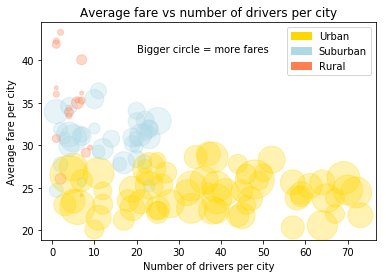

In [4]:
# Obtain the x and y coordinates for each of the three city types
x = averages_df["driver_count"]
y = averages_df["fare"]
s = [n**2 for n in averages_df["ride_count"]]
city_pop = averages_df["city_type"]

# Build the scatter plots for each city types
plt.scatter(x, y, s=s, c=city_pop, alpha=0.3, cmap=cmap)

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size
# plt.labels("Bigger circle = more fares")
plt.xlabel("Number of drivers per city")
plt.ylabel("Average fare per city")
plt.title("Average fare vs number of drivers per city")
plt.text(20, 41, "Bigger circle = more fares")
plt.legend(handles=patch_data)

# Save Figure
plt.savefig("bubble.png")
plt.show()


 ## Total Fares by City Type

In [5]:
# Calculate Type Percents
city_fare_pct = []

for i in range(city_type_cnt):
    city_fare_pct.append(
        int(
            round(
                pyber_df.loc[
                    pyber_df.type == i, ["fare"]
                ].sum() /
                pyber_df.fare.sum(), 2
            ) * 100
        )
    )

for items in city_fare_pct:
    print(items)


63
30
7


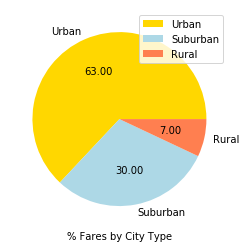

In [6]:
# Build Pie Chart
x = city_fare_pct

plt.pie(x, labels=city_type_names, colors=cmapList, autopct="%.2f")

plt.xlabel("% Fares by City Type")
plt.legend()

plt.savefig("fares_pie.png")
plt.show()


 ## Total Rides by City Type

In [7]:
# Calculate Ride Percents
city_total_rides_pct = []

for i in range(city_type_cnt):
    city_total_rides_pct.append(
        int(
            round(
                averages_df.loc[
                    averages_df.city_type == i, ["ride_count"]
                ].sum() / averages_df["ride_count"].sum(), 2
            ) * 100
        )
    )

for items in city_total_rides_pct:
    print(items)


68
26
5


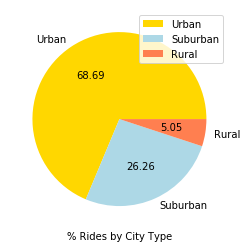

In [8]:
# Build Pie Chart
x = city_total_rides_pct

plt.pie(x, labels=city_type_names, colors=cmapList, autopct="%.2f")
plt.xlabel("% Rides by City Type")

plt.legend()

plt.savefig("rides_pie.png")
plt.show()


 ## Total Drivers by City Type

In [9]:
# Calculate Driver Percents
city_driver_pct = []

for i in range(city_type_cnt):
    city_driver_pct.append(
        int(
            round(
                averages_df.loc[
                    averages_df["city_type"] == i, ["driver_count"]
                ].sum() / averages_df["driver_count"].sum(), 2
            ) * 100
        )
    )

for items in city_driver_pct:
    print(items)


81
16
3


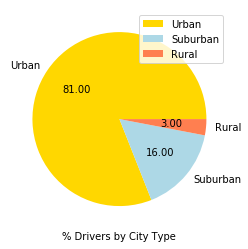

In [10]:
# Build Pie Charts
x = city_driver_pct

plt.pie(x, labels=city_type_names, colors=cmapList, autopct="%.2f")
plt.xlabel("% Drivers by City Type")
plt.legend()

plt.savefig("drivers_pie.png")
plt.show()


 ## Observations
 1. Most of the drivers, rides, and fares are in Urban locations
 2. Urban areas have more drivers than they have rides
 3. Suburban areas have more rides than they have drivers